In [1]:
import sys; sys.path.append('/sj0243/')

In [2]:
from python_for_nustar.nu_core import np, plt, os, glob, scan_phase_resolved_products, reduce_list, create_dir, pd, make_grppha_and_wd
from python_for_nustar.nu_class import NustarObservation
from python_for_nustar.pipeline.sj0243_init import Nu_path, ObsList
from python_for_nustar.pyxspec_lib.definitions import Model, Xset, AllModels, Fit, Plot, AllData, AllModels, xspec, showmodel
from python_for_nustar.pyxspec_lib.nustar_xspec import fit_spectra, ph_res_param, query_par, scan_containers_ph_res, plot_ph_res_storage
#prodpath_ph_res = 'phase_resolved' 
prod_shift = 0
ObsID = ObsList[0] 
nu_obs = NustarObservation(ObsID, nu_path=Nu_path)
ph_ave_folder = nu_obs.products_path+'/spe_and_lc'
ph_res_folder = nu_obs.products_path+'/phase_resolved'
model_name = 'relxilllp'
AllModels.lmod('relxill', '/sj0243/python_for_nustar/relxill_model/')
calc_errors = True

AllModels.clear()
Xset.parallel.error = 22



pd.set_option('display.max_columns', 500)


###
Observation 90302319002 loaded successfully


## Phase-averaged spectra

 *** loading RELXILL model (version 1.4.3) *** 
deleted xspec/relxilllp/*90302319002_relxilllp* and xspec/relxilllp/xcm/*90302319002_relxilllp* files
Try loading storage xspec/relxilllp/90302319002_relxilllp.storage
no storage found. fitting...
 loaded spe_and_lcA_sr.pi and spe_and_lcB_sr.pi from /sj0243/results/out90302319002/products/spe_and_lc
fitting done
skipping errors for: []
    18      1.00872      1.01256    (-0.00191777,0.0019231)
     3      3.07751      3.13113    (-0.0270952,0.0265308)
     4      2.00911      2.10895    (-0.0490405,0.0507931)
     8      37.4753      49.9194    (-5.49749,6.94669)
    11      1.10177      1.14453    (-0.0213191,0.0214413)
    12      3.23156      3.43978    (-0.115019,0.0931985)
    14      24.7625      26.5997    (-0.8855,0.951754)
    15    0.0656703    0.0858107    (-0.00919134,0.010949)
    17    0.0210672     0.021776    (-0.000366188,0.000342648)
Fit done 
 chi2 = 2416.37966865924 for 2292 dof, chi2_red = 1.054266871142775, H0 prob 

,N,srcID,comp,par,ipar,val,error_l,error_u,er_status,sigma,frozen,link
0,0,90302319002_relxilllp_FPMA,constant,factor,1,1.000000,0.000000,0.000000,FFFFFFFFF,0.000000,True,
1,0,90302319002_relxilllp_FPMA,phabs,nH,2,0.800000,0.000000,0.000000,FFFFFFFFF,0.000000,True,
2,0,90302319002_relxilllp_FPMA,bbodyrad,kT,3,3.104601,3.077506,3.131132,FFFFFFFFF,0.015938,False,
3,0,90302319002_relxilllp_FPMA,bbodyrad,norm,4,2.058154,2.009113,2.108947,FFFFFFFFF,0.030378,False,
4,0,90302319002_relxilllp_FPMA,relxilllp,h,5,5.000000,0.000000,0.000000,FFFFFFFFF,0.000000,True,
5,0,90302319002_relxilllp_FPMA,relxilllp,a,6,0.000000,0.000000,0.000000,FFFFFFFFF,0.000000,True,
6,0,90302319002_relxilllp_FPMA,relxilllp,Incl,7,10.000000,0.000000,0.000000,FFFFFFFFF,0.000000,True,
7,0,90302319002_relxilllp_FPMA,relxilllp,Rin,8,42.972757,37.475270,49.919447,FFFFFFFFF,3.922103,False,
8,0,90302319002_relxilllp_FPMA,relxilllp,Rout,9,47.270033,0.000000,0.000000,FFFFFTFFF,0.000000,False,= 1.1*p8
9,0,90302319002_relxilllp_FPMA,relxilllp,z,10,0.000000,0.000000,0.000000,FFFFFFFFF,0.000000,True,


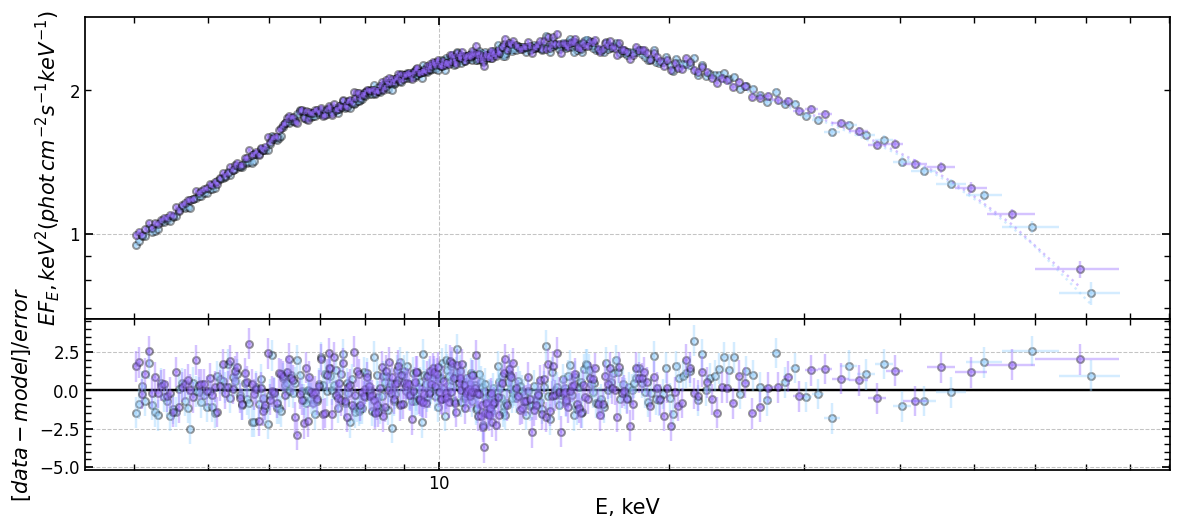

In [3]:
os.chdir(ph_ave_folder)
create_dir('xspec')



mo_cutoffpl = Model("constant*phabs*(bbodyrad+relxilllp)")
mo_cutoffpl.phabs.nH = '0.8 -1'



mo_cutoffpl.bbodyrad.kT = '3'
mo_cutoffpl.bbodyrad.norm = '2' # ,, 0.1, 0.2, 3, 4'



mo_cutoffpl.relxilllp.h = '5 -1'
mo_cutoffpl.relxilllp.a = '0 -1'
mo_cutoffpl.relxilllp.Incl = '10'
mo_cutoffpl.relxilllp.Incl.frozen = True
mo_cutoffpl.relxilllp.Rin = '35 0.1, 0, 0, 900, 900'
mo_cutoffpl.relxilllp.Rout = '=1.1*p8'
mo_cutoffpl.relxilllp.z = '0 -1'
mo_cutoffpl.relxilllp.gamma = '1.1  0.005 0.1 0.1 3 3'
mo_cutoffpl.relxilllp.logxi = '3.3'
mo_cutoffpl.relxilllp.Ecut = '24'
mo_cutoffpl.relxilllp.Ecut.frozen = False
mo_cutoffpl.relxilllp.refl_frac = '0.07'
mo_cutoffpl.relxilllp.fixReflFrac = '0'
mo_cutoffpl.relxilllp.Afe = '5 -1'
mo_cutoffpl.relxilllp.norm = '2e-2'




mo_fid_pars = fit_spectra(model = mo_cutoffpl, model_name = model_name, prefix = ObsID, dataset='spe_and_lc', min_bin='50', min_sig='50', rewrite = True, calc_errors = calc_errors, eqw_comps='')
mo_fid_pars